In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
# Load in the full dataset
df = pd.read_csv("cleaned_data.csv")

# Make a copy of the full dataset; this is the one we will manipulate while still retaining the full original data
df_subset = df
df_subset.head()

,Country,Age,Annual_Salary,Gender,Education,Payment_Method_Credit_Debit,Living_Region,Online_Service_Preference,AI_Enhance_Experience,AI_Satisfaction,...,AI_Tools_Used_Voice_Photo,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing,AI_Trust,AI_Usage
0,INDIA,Gen X,Medium High,Female,Master's Degree,NO,Metropolitan,NO,YES,YES,...,YES,YES,NO,YES,YES,YES,YES,YES,Moderate,high
1,INDIA,Gen Z,Low,Male,University Graduate,YES,Metropolitan,NO,YES,YES,...,YES,YES,YES,YES,YES,NO,NO,NO,Moderate,high
2,INDIA,Gen X,Medium High,Male,University Graduate,YES,Rural Areas,YES,YES,YES,...,NO,YES,YES,YES,YES,YES,NO,NO,Moderate,low
3,INDIA,Gen X,High,Male,University Graduate,YES,Rural Areas,YES,YES,YES,...,NO,YES,YES,YES,YES,YES,NO,YES,Moderate,none
4,INDIA,Gen Z,Low,Male,University Graduate,NO,Rural Areas,YES,YES,YES,...,NO,YES,YES,YES,NO,YES,NO,YES,Moderate,low


In [159]:
## This is for binary columns

# Specify the columns you want to modify
columns_to_modify = ['Payment_Method_Credit_Debit', 'Online_Service_Preference', 'AI_Enhance_Experience', 'AI_Satisfaction',
                     'AI_Tools_Used_Chatbots', 'AI_Tools_Used_Virtual_Assistant', 'AI_Tools_Used_Voice_Photo',
                     'Payment_Method_COD', 'Payment_Method_Ewallet', 'Product_Category_Appliances',
                     'Product_Category_Electronics', 'Product_Category_Groceries', 'Product_Category_Personal_Care',
                     'Product_Category_Clothing']

# Function to convert to binary
def col_binary(value):
    return 1 if value == 'YES' else 0

# Function to convert to binary
def gender_binary(value):
    return 1 if value == 'Male' else 0


# Apply the function to the specified columns
df_subset[columns_to_modify] = df_subset[columns_to_modify].applymap(col_binary)
df_subset['Gender'] = df_subset['Gender'].map(gender_binary)



df_subset.head()

<ipython-input-159-d15843a80ad2>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_subset[columns_to_modify] = df_subset[columns_to_modify].applymap(col_binary)


,Country,Age,Annual_Salary,Gender,Education,Payment_Method_Credit_Debit,Living_Region,Online_Service_Preference,AI_Enhance_Experience,AI_Satisfaction,...,AI_Tools_Used_Voice_Photo,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing,AI_Trust,AI_Usage
0,INDIA,Gen X,Medium High,0,Master's Degree,0,Metropolitan,0,1,1,...,1,1,0,1,1,1,1,1,Moderate,high
1,INDIA,Gen Z,Low,1,University Graduate,1,Metropolitan,0,1,1,...,1,1,1,1,1,0,0,0,Moderate,high
2,INDIA,Gen X,Medium High,1,University Graduate,1,Rural Areas,1,1,1,...,0,1,1,1,1,1,0,0,Moderate,low
3,INDIA,Gen X,High,1,University Graduate,1,Rural Areas,1,1,1,...,0,1,1,1,1,1,0,1,Moderate,none
4,INDIA,Gen Z,Low,1,University Graduate,0,Rural Areas,1,1,1,...,0,1,1,1,0,1,0,1,Moderate,low


In [160]:
## This is for the ordered data
# Defining the ordinal mapping for the Age column
age_mapping = {
    'Gen Z' : 1,
    'Millennials' : 2,
    'Gen X' : 2,
    'Baby Boomers' : 4
}

# Defining the ordinal mapping for the Salary column
salary_mapping= {
    'Low' : 1,
    'Medium' : 2,
    'Medium High' : 3,
    'High' : 4
}

# Defining the ordinal mapping for the education column
education_mapping = {
    'Highschool Graduate' : 1,
    'University Graduate' : 2,
    "Master's Degree" : 3,
    'Doctorate Degree' : 4
}

# Defining the ordinal mapping for the ai_trust column
aitrust_mapping = {
    'Low' : 1,
    'Moderate' : 2,
    'High' : 3
}

# Defining the ordinal mapping for the ai_trust column
aitrust_mapping = {
    'Low' : 1,
    'Moderate' : 2,
    'High' : 3
}

# Defining the ordinal mapping for the ai_trust column
aiusage_mapping = {
    'none' : 0,
    'low' : 1,
    'moderate' : 2,
    'high' : 3
}
# Apply the mapping to each of the columns
df_subset['Annual_Salary'] = df_subset['Annual_Salary'].map(salary_mapping)
df_subset['Age'] = df_subset['Age'].map(age_mapping)
df_subset['Education'] = df_subset['Education'].map(education_mapping)
df_subset['AI_Trust'] = df_subset['AI_Trust'].map(aitrust_mapping)
df_subset['AI_Usage'] = df_subset['AI_Usage'].map(aiusage_mapping)

df_subset.head()

,Country,Age,Annual_Salary,Gender,Education,Payment_Method_Credit_Debit,Living_Region,Online_Service_Preference,AI_Enhance_Experience,AI_Satisfaction,...,AI_Tools_Used_Voice_Photo,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing,AI_Trust,AI_Usage
0,INDIA,2,3,0,3,0,Metropolitan,0,1,1,...,1,1,0,1,1,1,1,1,2,3
1,INDIA,1,1,1,2,1,Metropolitan,0,1,1,...,1,1,1,1,1,0,0,0,2,3
2,INDIA,2,3,1,2,1,Rural Areas,1,1,1,...,0,1,1,1,1,1,0,0,2,1
3,INDIA,2,4,1,2,1,Rural Areas,1,1,1,...,0,1,1,1,1,1,0,1,2,0
4,INDIA,1,1,1,2,0,Rural Areas,1,1,1,...,0,1,1,1,0,1,0,1,2,1


In [161]:
## Freqeuncy encoding
# Finding the frequency of each value
country_freq = df_subset['Country'].value_counts()

# applying the frequences to the country column
df_subset['Country'] = df_subset['Country'].map(country_freq)

# Defining the mapping for living_region
living_region_mapping = {
    'Metropolitan': 1,
    'Suburban Areas': 10,
    'Rural Areas': 11
}

df_subset['Living_Region'] = df_subset['Living_Region'].map(living_region_mapping)

df_subset.head()


,Country,Age,Annual_Salary,Gender,Education,Payment_Method_Credit_Debit,Living_Region,Online_Service_Preference,AI_Enhance_Experience,AI_Satisfaction,...,AI_Tools_Used_Voice_Photo,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing,AI_Trust,AI_Usage
0,165,2,3,0,3,0,1,0,1,1,...,1,1,0,1,1,1,1,1,2,3
1,165,1,1,1,2,1,1,0,1,1,...,1,1,1,1,1,0,0,0,2,3
2,165,2,3,1,2,1,11,1,1,1,...,0,1,1,1,1,1,0,0,2,1
3,165,2,4,1,2,1,11,1,1,1,...,0,1,1,1,1,1,0,1,2,0
4,165,1,1,1,2,0,11,1,1,1,...,0,1,1,1,0,1,0,1,2,1


In [162]:
df_subset.dtypes

,0
Country,int64
Age,int64
Annual_Salary,int64
Gender,int64
Education,int64
Payment_Method_Credit_Debit,int64
Living_Region,int64
Online_Service_Preference,int64
AI_Enhance_Experience,int64
AI_Satisfaction,int64


In [163]:
# We might need to change these values at a later time
df['Living_Region'].unique()


array([ 1, 11, 10])

In [164]:
# *** Please Note ***
# For These Columns:
# 'Payment_Method_Credit_Debit',
# 'Online_Service_Preference',
# 'AI_Enhance_Experience',
# 'AI_Satisfaction'
# 'AI_Tools_Used_Chatbots',
# 'AI_Tools_Used_Virtual_Assistant',
# 'AI_Tools_Used_Voice_Photo',
# 'Payment_Method_COD',
# 'Payment_Method_Ewallet',
# 'Product_Category_Appliances',
# 'Product_Category_Electronics',
# 'Product_Category_Groceries',
# 'Product_Category_Personal_Care',
# 'Product_Category_Clothing'

# 1 = Yes | 0 = No
# ___________________________________________________________________________________________-

# For This Column:
# 'Gender'

# 1 = Male | 0 = Female
# ___________________________________________________________________________________________-

# For This Column:
# 'Age'

# 1 = Gen Z | 2 = Millennials | 3 = Gen X | 4 = Baby Boomers
# ___________________________________________________________________________________________

# For These Columns:
# 'Salary'

# 1 = Low | 2 = Medium | 3 = Medium High | 4 = High
# ___________________________________________________________________________________________

# For These Columns:
# 'Education'

# 1 = Highschool Graduate | 2 = University Graduate | 3 = Master's Degree | 4 = Doctorate Degree
# ___________________________________________________________________________________________

# For These Columns:
# 'AI Trust'

# 1 = Low | 2 = Moderate | 3 = High
# ___________________________________________________________________________________________

# For These Columns:
# 'AI Usage'

# 0 = None | 1 = Low | 2 = Moderate | 3 = High

In [165]:
from os import read
# Export DataFrame to CSV
df.to_csv('encoded_data.csv', index=False)

df = pd.read_csv("encoded_data.csv")

In [ ]:
### COUNTRY SPECIFIC PROCESSING

Accuracy for Canada: 0.72
Classification Report for Canada:
              precision    recall  f1-score   support

           0       0.47      0.54      0.50        13
           1       0.83      0.78      0.81        37

    accuracy                           0.72        50
   macro avg       0.65      0.66      0.65        50
weighted avg       0.73      0.72      0.73        50

Accuracy for China: 0.8148148148148148
Classification Report for China:
              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.87      0.91      0.89        45

    accuracy                           0.81        54
   macro avg       0.65      0.62      0.63        54
weighted avg       0.80      0.81      0.81        54

Accuracy for India: 1.0
Classification Report for India:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


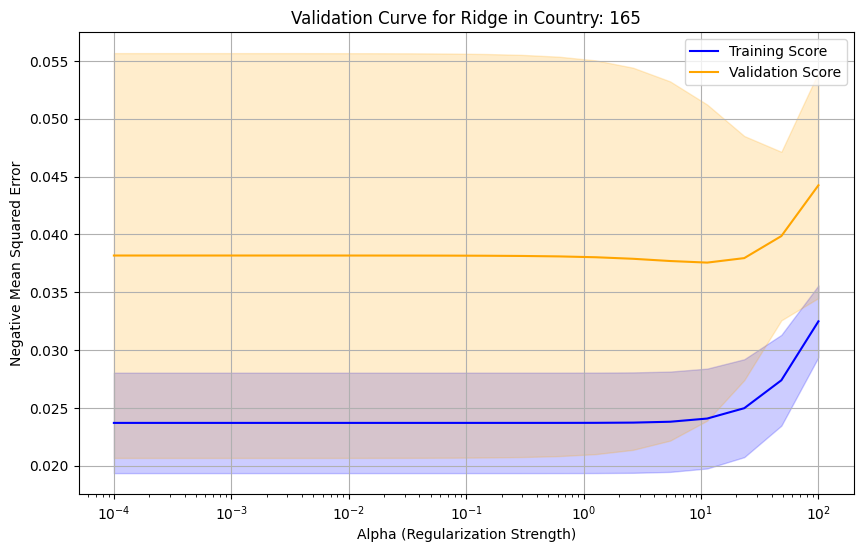

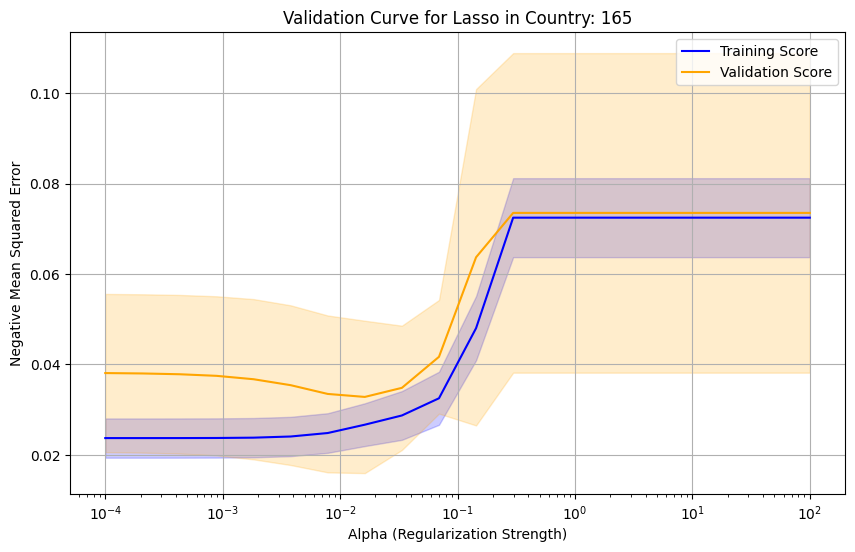

Accuracy for Canada: 0.72
Classification Report for Canada:
              precision    recall  f1-score   support

           0       0.47      0.54      0.50        13
           1       0.83      0.78      0.81        37

    accuracy                           0.72        50
   macro avg       0.65      0.66      0.65        50
weighted avg       0.73      0.72      0.73        50

Accuracy for China: 0.8148148148148148
Classification Report for China:
              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.87      0.91      0.89        45

    accuracy                           0.81        54
   macro avg       0.65      0.62      0.63        54
weighted avg       0.80      0.81      0.81        54

Accuracy for India: 1.0
Classification Report for India:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


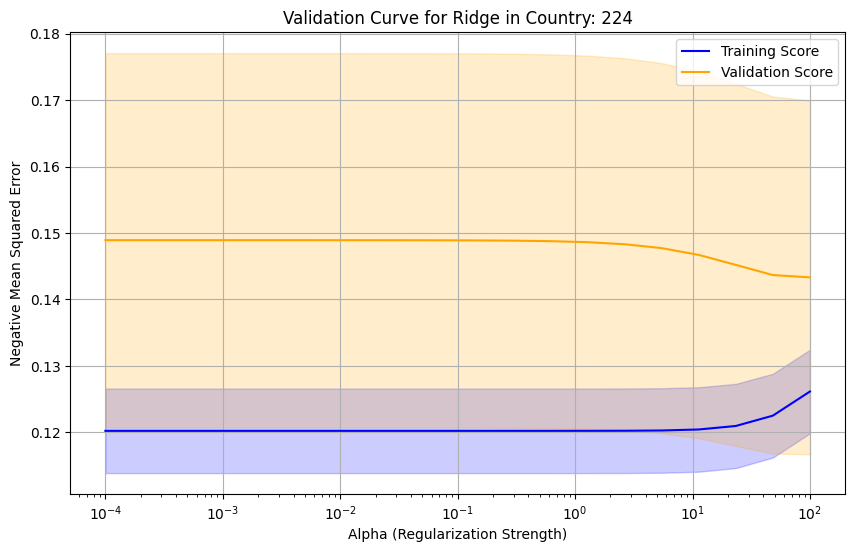

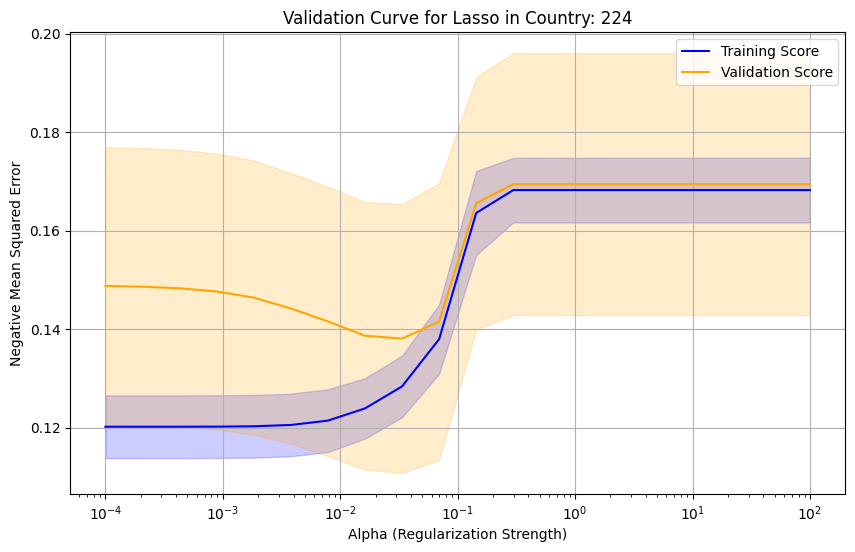

Accuracy for Canada: 0.72
Classification Report for Canada:
              precision    recall  f1-score   support

           0       0.47      0.54      0.50        13
           1       0.83      0.78      0.81        37

    accuracy                           0.72        50
   macro avg       0.65      0.66      0.65        50
weighted avg       0.73      0.72      0.73        50

Accuracy for China: 0.8148148148148148
Classification Report for China:
              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.87      0.91      0.89        45

    accuracy                           0.81        54
   macro avg       0.65      0.62      0.63        54
weighted avg       0.80      0.81      0.81        54

Accuracy for India: 1.0
Classification Report for India:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


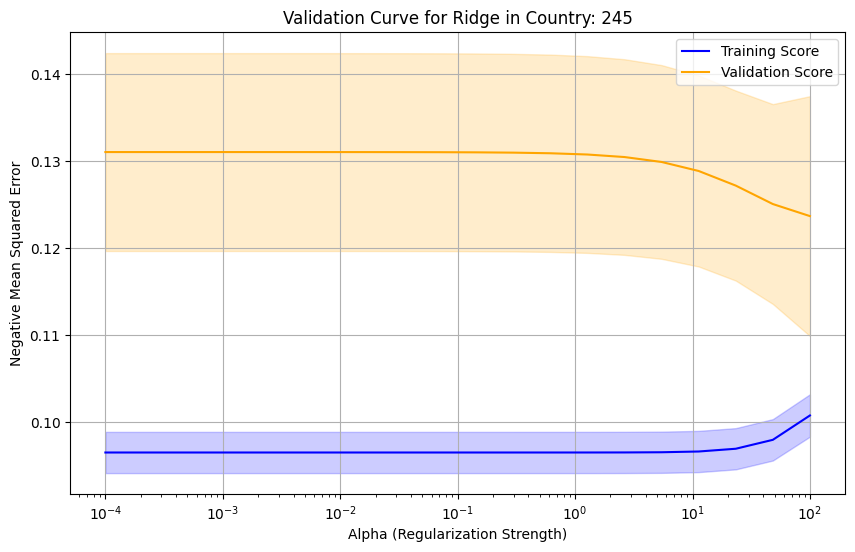

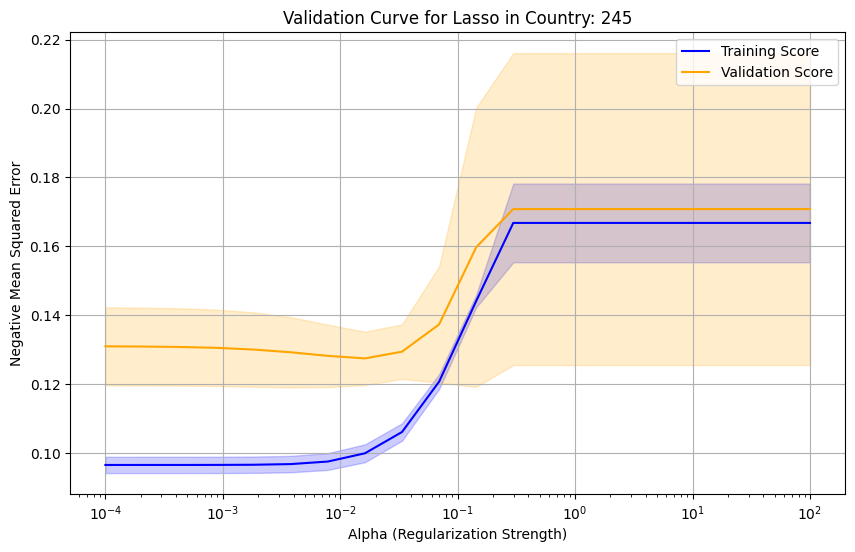

In [154]:
# AC: Country Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV, learning_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# AC: Split data by 'Country'
country_groups = df.groupby('Country')  # Group data by 'Country'

# Initialize dictionaries for storing results
X_train_balanced = {}
y_train_balanced = {}
X_train_pca = {}
X_test_pca = {}
ridge_rmse = {}
lasso_rmse = {}

# AC: Loop through each country
for country, group in country_groups:
    # Separate features (X) and target variable (y)
    X = group.drop('AI_Satisfaction', axis=1)
    y = group['AI_Satisfaction']

    # AC: Feature Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Scale features

    # Filter data by country
    canada_data = df[df['Country'] == 224]
    china_data = df[df['Country'] == 245]
    india_data = df[df['Country'] == 165]

    # For Canada
    X_canada = canada_data.drop('AI_Satisfaction', axis=1)
    y_canada = canada_data['AI_Satisfaction']
    X_train_canada, X_test_canada, y_train_canada, y_test_canada = train_test_split(X_canada, y_canada, test_size=0.22, random_state=42)

    # For China
    X_china = china_data.drop('AI_Satisfaction', axis=1)
    y_china = china_data['AI_Satisfaction']
    X_train_china, X_test_china, y_train_china, y_test_china = train_test_split(X_china, y_china, test_size=0.22, random_state=42)

    # For India
    X_india = india_data.drop('AI_Satisfaction', axis=1)
    y_india = india_data['AI_Satisfaction']
    X_train_india, X_test_india, y_train_india, y_test_india = train_test_split(X_india, y_india, test_size=0.22, random_state=42)

    # Initialize LDA
    lda = LinearDiscriminantAnalysis()

    # Fit and predict for Canada
    lda.fit(X_train_canada, y_train_canada)
    y_pred_canada = lda.predict(X_test_canada)
    print(f"Accuracy for Canada: {accuracy_score(y_test_canada, y_pred_canada)}")
    print("Classification Report for Canada:")
    print(classification_report(y_test_canada, y_pred_canada))

    # Fit and predict for China
    lda.fit(X_train_china, y_train_china)
    y_pred_china = lda.predict(X_test_china)
    print(f"Accuracy for China: {accuracy_score(y_test_china, y_pred_china)}")
    print("Classification Report for China:")
    print(classification_report(y_test_china, y_pred_china))

    # Fit and predict for India
    lda.fit(X_train_india, y_train_india)
    y_pred_india = lda.predict(X_test_india)
    print(f"Accuracy for India: {accuracy_score(y_test_india, y_pred_india)}")
    print("Classification Report for India:")

    print(classification_report(y_test_india, y_pred_india))

    ## Ridge and Lasso Regression
    # Apply Ridge Regression (L2 Regularization)
    ridge_model = Ridge(alpha=10)
    ridge_model.fit(X_train, y_train)
    ridge_preds = ridge_model.predict(X_test)
    ridge_rmse[country] = mean_squared_error(y_test, ridge_preds, squared=False)
    print(f"Ridge RMSE for {country}: {ridge_rmse[country]}")

    # Apply Lasso Regression (L1 Regularization)
    lasso_model = Lasso(alpha=10)
    lasso_model.fit(X_train, y_train)
    lasso_preds = lasso_model.predict(X_test)
    lasso_rmse[country] = mean_squared_error(y_test, lasso_preds, squared=False)
    print(f"Lasso RMSE for {country}: {lasso_rmse[country]}")

    ## Validation Curves for Ridge and Lasso
    alpha_values = np.logspace(-4, 2, 20)  # Range of alpha values to test for Ridge and Lasso
    for model_name, model in {'Ridge': ridge_model, 'Lasso': lasso_model}.items():
        train_scores, test_scores = validation_curve(
            model, X_scaled, y, param_name="alpha", param_range=alpha_values, cv=5, scoring="neg_mean_squared_error"
        )

        # Calculate mean and standard deviation of the validation curve
        train_mean = -np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = -np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        # Plot the validation curve for each model
        plt.figure(figsize=(10, 6))
        plt.plot(alpha_values, train_mean, label="Training Score", color="blue")
        plt.plot(alpha_values, test_mean, label="Validation Score", color="orange")
        plt.fill_between(alpha_values, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
        plt.fill_between(alpha_values, test_mean - test_std, test_mean + test_std, color="orange", alpha=0.2)
        plt.xscale("log")
        plt.title(f"Validation Curve for {model_name} in Country: {country}")
        plt.xlabel("Alpha (Regularization Strength)")
        plt.ylabel("Negative Mean Squared Error")
        plt.legend(loc="best")
        plt.grid()
        plt.show()

Processing for country: 165
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Optimal alpha for country 165: 0.001
Mean Squared Error on test set for country 165: 0.01950323145361176
Processing for country: 224
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Optimal alpha for country 224: 0.001
Mean Squared Error on test set for country 224: 0.2512706511933457
Processing for country: 245
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Optimal alpha for country 245: 0.001
Mean Squared Error on test set for country 245: 0.1611671931521434


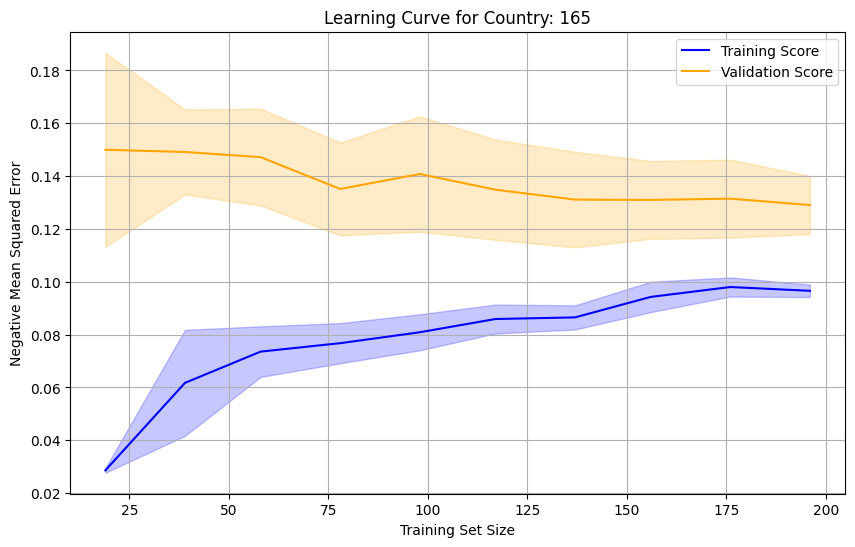

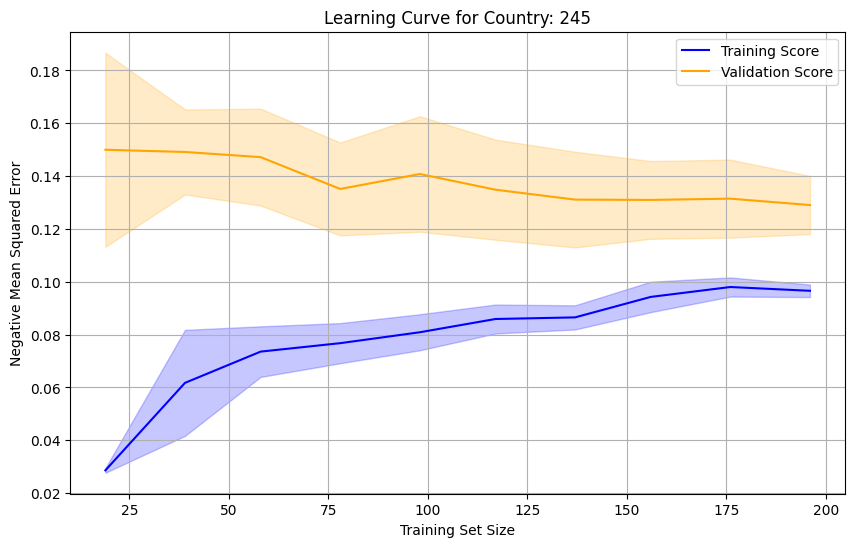

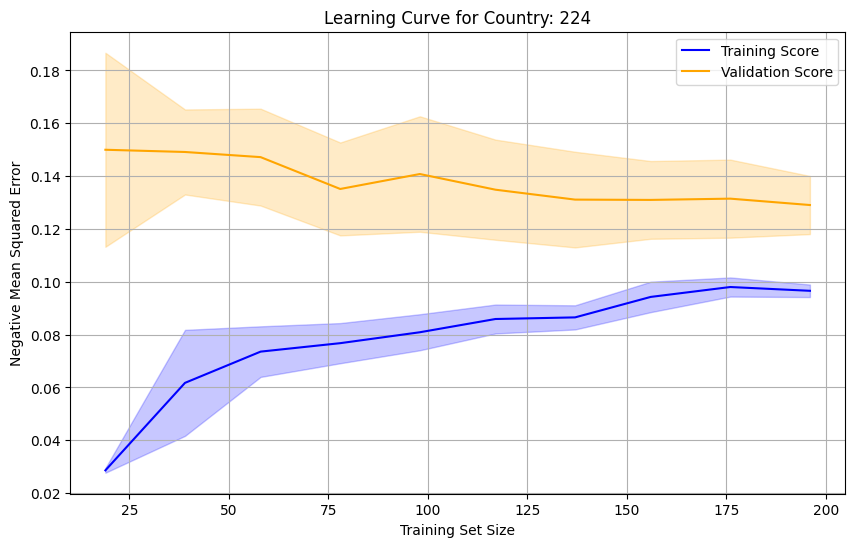

In [156]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Iterate through the country groups and process separately
for country, group_data in country_groups:
    print(f"Processing for country: {country}")

    # Separate features (X) and target variable (y)
    X_country = group_data.drop('AI_Satisfaction', axis=1)
    y_country = group_data['AI_Satisfaction']

    # Feature scaling
    X_country_scaled = scaler.fit_transform(X_country)

    # Split data into training and testing sets (78% train, 22% test)
    X_train, X_test, y_train, y_test = train_test_split(X_country_scaled, y_country, test_size=0.22, random_state=42)

    # Apply LDA (instead of PCA)
    lda = LinearDiscriminantAnalysis(n_components=1)  # You can set n_components to the number of classes - 1
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)

    # Handle class imbalance with SMOTE
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_lda, y_train)

    # GridSearch for Ridge Regression with cross-validation
    grid_search.fit(X_train_balanced, y_train_balanced)

    best_alpha = grid_search.best_params_['alpha']
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test_lda)

    # Evaluate performance (Mean Squared Error)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Optimal alpha for country {country}: {best_alpha}")
    print(f"Mean Squared Error on test set for country {country}: {mse}")

# AC: Learning Curve for Ridge across all countries
for country in df['Country'].unique():
    train_sizes, train_scores, test_scores = learning_curve(
        Ridge(alpha=10), X_scaled, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring="neg_mean_squared_error"
    )

    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
    plt.plot(train_sizes, test_mean, label="Validation Score", color="orange")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.22)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="orange", alpha=0.22)

    plt.title(f"Learning Curve for Country: {country}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Negative Mean Squared Error")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


<Figure size 1000x600 with 0 Axes>

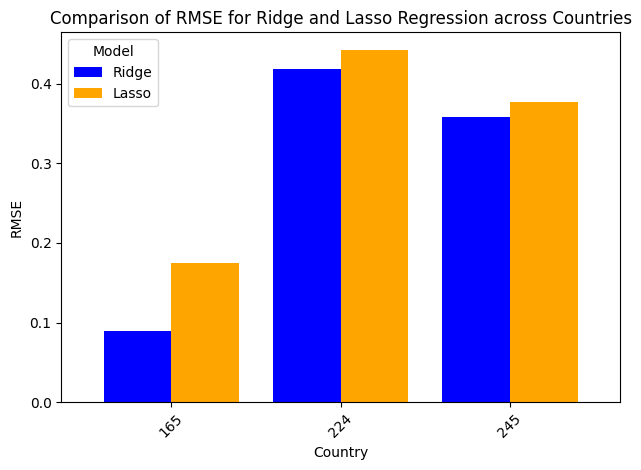

In [142]:
import matplotlib.pyplot as plt

# Create a dataframe for the RMSE values
countries = list(ridge_rmse.keys())  # List of countries
ridge_rmse_values = list(ridge_rmse.values())  # Ridge RMSE values
lasso_rmse_values = list(lasso_rmse.values())  # Lasso RMSE values

# Create a DataFrame for easy plotting
import pandas as pd
rmse_df = pd.DataFrame({
    'Country': countries,
    'Ridge RMSE': ridge_rmse_values,
    'Lasso RMSE': lasso_rmse_values
})

# Plot the comparison of MSE for each country
plt.figure(figsize=(10, 6))
rmse_df.set_index('Country').plot(kind='bar', color=['blue', 'orange'], width=0.8)
plt.title('Comparison of RMSE for Ridge and Lasso Regression across Countries')
plt.ylabel('RMSE')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Model', labels=['Ridge', 'Lasso'])
plt.show()

In [ ]:
### FULL DATA PROCESSING

In [143]:
df = pd.read_csv("encoded_data.csv")

In [144]:
## AC: Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [145]:
## AC: Test-Train
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('AI_Satisfaction', axis=1)
y = df['AI_Satisfaction']

# Split data into training and testing sets (78% train, 22% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [146]:
    # AC: Initialize LDA
    lda = LinearDiscriminantAnalysis()

    # Fit LDA on the full dataset (training data)
    lda.fit(X_train, y_train)

    # Predict on the test set
    y_pred = lda.predict(X_test)

    # Evaluate the model
    print(f"Accuracy on Full Dataset: {accuracy_score(y_test, y_pred)}")
    print("Classification Report for Full Dataset:")
    print(classification_report(y_test, y_pred))

    # Plotting the first two discriminant components
    lda_components = lda.transform(X_test)

Accuracy on Full Dataset: 0.8571428571428571
Classification Report for Full Dataset:
              precision    recall  f1-score   support

           0       0.60      0.39      0.47        23
           1       0.89      0.95      0.92       117

    accuracy                           0.86       140
   macro avg       0.74      0.67      0.70       140
weighted avg       0.84      0.86      0.84       140



In [147]:
## AC: Address class imbalance with Oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [148]:
## AC: Handle Overfitting
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the data 78/22
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

# Ridge (L2 Regularization)
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)

# Lasso (L1 Regularization)
lasso_model = Lasso(alpha=10)
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)

# Evaluate performance
ridge_rmse = mean_squared_error(y_test, ridge_preds, squared=False)
lasso_rmse = mean_squared_error(y_test, lasso_preds, squared=False)

print(f"Ridge RMSE: {ridge_rmse}")
print(f"Lasso RMSE: {lasso_rmse}")

Ridge RMSE: 0.340846770048875
Lasso RMSE: 0.3709667734483333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


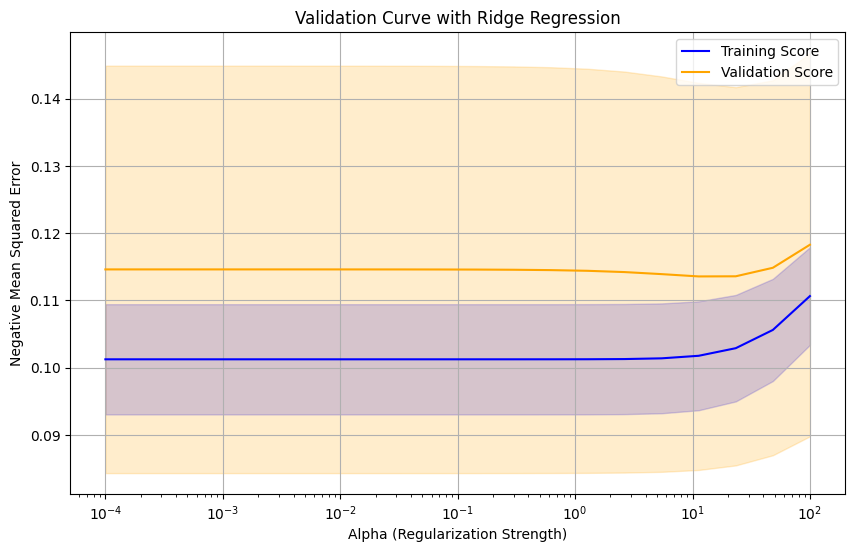

In [149]:
# AC: Validation curve
import numpy as np
from sklearn.model_selection import validation_curve

# Define range of alpha values
alpha_values = np.logspace(-4, 2, 20)

# Validation curve for Ridge
train_scores, test_scores = validation_curve(
    Ridge(), X, y, param_name="alpha", param_range=alpha_values, cv=5, scoring="neg_mean_squared_error"
)

# Calculate mean and standard deviation
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot validation curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_mean, label="Training Score", color="blue")
plt.plot(alpha_values, test_mean, label="Validation Score", color="orange")

# Shading for standard deviation
plt.fill_between(alpha_values, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(alpha_values, test_mean - test_std, test_mean + test_std, color="orange", alpha=0.2)

plt.xscale("log")
plt.title("Validation Curve with Ridge Regression")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.grid()
plt.show()

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Optimal alpha value: 10
Mean Squared Error on test set: 0.11617652065275065


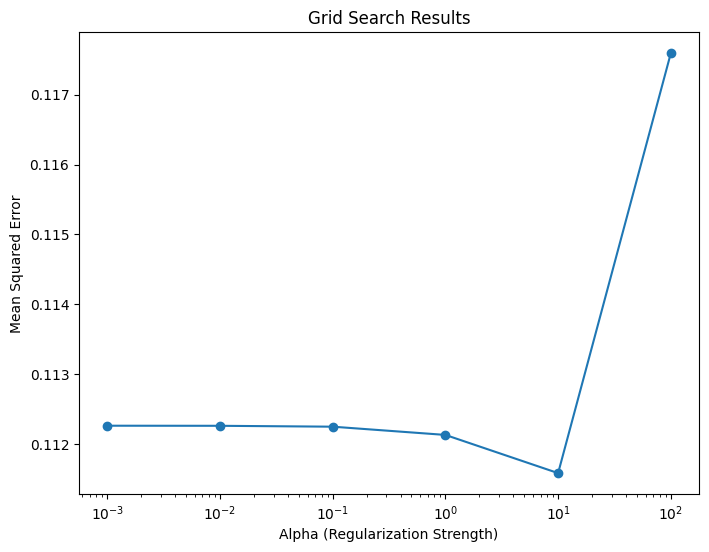

In [150]:
# AC: Optimal alpha
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define the model
ridge = Ridge()

# Define the parameter grid for alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    return_train_score=True,
    verbose=1
)

# Fit to the training data
grid_search.fit(X_train, y_train)

# Get the best alpha value and model
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

print(f"Optimal alpha value: {best_alpha}")

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set: {mse}")

results = grid_search.cv_results_
alphas = param_grid['alpha']
mean_test_scores = -results['mean_test_score']

plt.figure(figsize=(8, 6))
plt.plot(alphas, mean_test_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Grid Search Results')
plt.show()

In [151]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

# Select the 6 most important features
top_6_features = feature_importance['Feature'].head(6).values

# Filter the original dataset to include only the top 6 features
X_train_reduced = X_train[top_6_features]
X_test_reduced = X_test[top_6_features]

# Optionally, you can print the reduced feature sets
print(f"Top 6 features: {top_6_features}")

                            Feature  Coefficient
8             AI_Enhance_Experience     0.278342
7         Online_Service_Preference     0.196802
16       Product_Category_Groceries     0.081304
18        Product_Category_Clothing     0.069422
4                         Education     0.048433
15     Product_Category_Electronics     0.036561
11        AI_Tools_Used_Voice_Photo     0.020284
3                            Gender     0.019807
17   Product_Category_Personal_Care     0.015062
14      Product_Category_Appliances     0.007953
20                         AI_Usage     0.001767
6                     Living_Region     0.000586
1                               Age    -0.000802
0                           Country    -0.001694
10  AI_Tools_Used_Virtual_Assistant    -0.006839
9            AI_Tools_Used_Chatbots    -0.011679
19                         AI_Trust    -0.014752
13           Payment_Method_Ewallet    -0.020186
2                     Annual_Salary    -0.024441
12               Pay

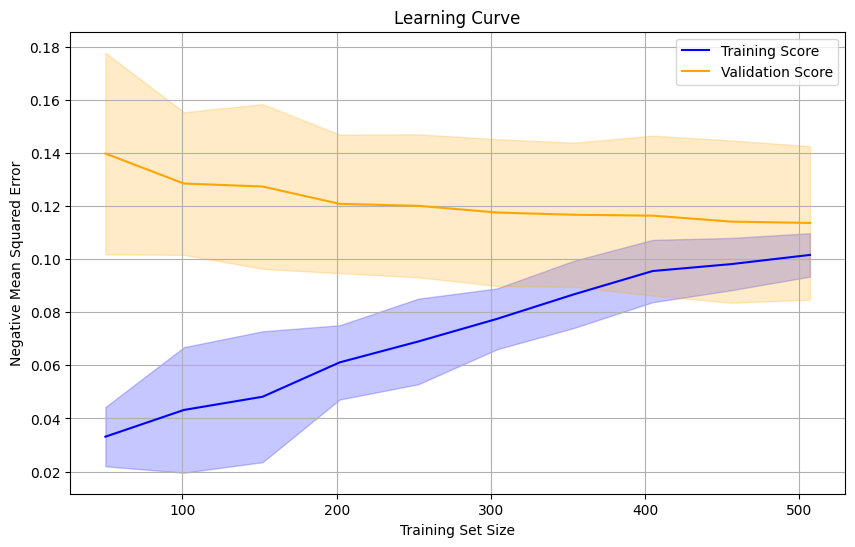

In [152]:
# AC: Learning curve
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    Ridge(alpha=10), X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring="neg_mean_squared_error"
)

# Calculate mean and standard deviation
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, test_mean, label="Validation Score", color="orange")

# Shading for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.22)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="orange", alpha=0.22)

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.grid()
plt.show()